In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1. Loading and preprocessing dataset**

#### **1.1 Loading the dataset**

Before we start any visualisation and interpretation of the data, we first have to look inside the dataset and, if required, perform some data cleaning steps. 

In [329]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [339]:
# Upload the dataset
data = pd.read_csv("heart.csv")

In [340]:
# Print a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [341]:
# Show if there are any nan values in each column
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [342]:
# Have a look at the column names of the dataset
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [343]:
# Have a look at the first 5 rows 
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Description of columns**


In [344]:
# info sources

`age`: age of the person<br><br>

`sex`: gender of the person <br>
  - `0`: female
  - `1`: male <br><br>

`cp`: chest pain type <br>
  - `0`: typical angina
  - `1`: atypical angina
  - `2`: non-anginal pain
  - `3`: asymptomatic <br><br>

`trtbps`: resting blood pressure <br>
- measured in millimeters of mercury (mm Hg) and recorded with the systolic number first, followed by the diastolic number.
- ideal: between 90/60mmHg and 120/80mmHg
- high: 140/90mmHg or higher
- low: 90/60mmHg or lower <br><br>

`chol`: <br>
- measured in milligrams (mg) of cholesterol per deciliter (dL) of blood: mg/dl
- optimal: less than 100 mg/dL
- near optimal/above optimal: 100-129 mg/dL
- borderline high: 130-159 mg/dL
- high: 160-189 mg/dL 
- very high: 190 mg/dL and above <br><br>

`fbs`: fasting blood sugar <br>
- normal: less than 100 mg/dL
- prediabetes: 100-125 mg/dL
- diabetes: 126 mg/dL or higher 
- fasting blood sugar > 120 mg/dl
  - `1`: > 120 mg/dl - true
  - `0`: <= 120 mg/dl - false <br><br>

`restecg`: resting electrocardiographic results <br>
  - `0`: normal
  - `1`: ST-T
  - `2`: hypertrophy <br><br>

`thalachh`: maximum heart rate achieved <br>
- normal: 72 <br><br>

`exng`: exercise induced angina <br>
- `0`: false
- `1`: true <br><br>

`oldpeak`: 
- ST depression induced by exercise relative to rest <br><br>

`slp`:
<br><br>

`caa`:
<br><br>

`thall`:
<br><br>

`output`:
<br><br>




#### **1.2 Preprocessing and cleaning the dataset**

In [345]:
# Rename the column names for a better readability
data.rename(columns={'cp':'chest_pain','trtbps': 'resting_BP','chol':'cholesterol', 
                   'fbs':'fasting_BS', 'restecg':'resting_ECG', 'thalachh': 'max_heart_rate', 
                   'slp': 'ST_slope', 'output':'HA_pred' }, inplace=True)

In [346]:
# Rename values for a better readability 
data.loc[:, 'sex'] = data['sex'].replace({0:'female', 1:'male'})

In [337]:
# Show the first 5 rows of the dataset
data.head(5)

,age,sex,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_heart_rate,exng,oldpeak,ST_slope,caa,thall,HA_pred
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [338]:
# Show the last 5 rows of the dataset
data.tail(5)

,age,sex,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_heart_rate,exng,oldpeak,ST_slope,caa,thall,HA_pred
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,female,1,130,236,0,0,174,0,0.0,1,1,2,0


#### **1.3 Looking into the data distribution**

##### **Measures of central tendency**

To map the observations into a single number, i.e. the `mean` and the `median` we will plot a univariate histogram that represents a distribution of a variable by counting the observations that fall within a discrete bin. We will work with the continuous variables first. The list is below:
- `age`
- `resting_BP`
- `cholesterol`
- `max_heart_rate`
- `oldpeak` 

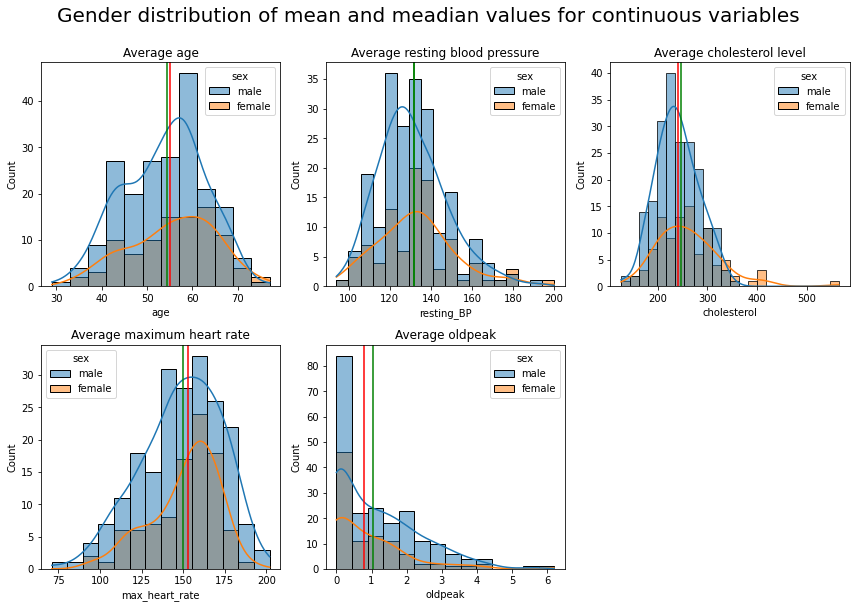

In [ ]:
# Find the mean and the median of the following continuous variables: age, resting_BP, cholesterol, max_heart_rate, oldpeak
fig, axes = plt.subplots(2,3, figsize=(12,8))

fig.suptitle('Gender distribution of mean and meadian values for continuous variables', fontsize=20, y=1.05)

# Find the mean and the median of 'age' for men and women 
axes[0,0] = sns.histplot(data=data, x='age', ax=axes[0,0], kde=True, hue='sex')
axes[0,0].axvline(data.age.mean(), color='green')
axes[0,0].axvline(data.age.median(), color='red')
axes[0,0].set(title='Average age', xlabel='age')

# Find the mean and the meadian of 'resting_BP' for men and women
axes[0,1] = sns.histplot(data=data, x='resting_BP', ax=axes[0,1], kde=True, hue='sex')
axes[0,1].axvline(data.resting_BP.mean(), color='green')
axes[0,1].axvline(data.resting_BP.mean(), color='green')
axes[0,1].set(title='Average resting blood pressure', xlabel='resting_BP')

# Find the mean and the median of 'cholesterol' levels for men and women
axes[0,2] = sns.histplot(data=data, x='cholesterol', ax=axes[0,2], kde=True, hue='sex')
axes[0,2].axvline(data.cholesterol.mean(), color='green')
axes[0,2].axvline(data.cholesterol.median(), color='red')
axes[0,2].set(title='Average cholesterol level', xlabel='cholesterol')

# Find the mean and the median of 'max_heart_rate' for men and women.
axes[1,0] = sns.histplot(data=data, x='max_heart_rate', ax=axes[1,0], kde=True, hue='sex')
axes[1,0].axvline(data.max_heart_rate.mean(), color='green')
axes[1,0].axvline(data.max_heart_rate.median(), color='red')
axes[1,0].set(title='Average maximum heart rate', xlabel='max_heart_rate')

# Find the mean and the median of'oldpeak' for men and women
axes[1,1] = sns.histplot(data=data, x='oldpeak', ax=axes[1,1], kde=True, hue='sex')
axes[1,1].axvline(data.oldpeak.mean(), color='green')
axes[1,1].axvline(data.oldpeak.median(), color='red')
axes[1,1].set(title='Average oldpeak', xlabel='oldpeak')

axes[1,2].set_visible(False)

fig.tight_layout()

##### **Measures of dispersion** 

In [ ]:
####### some example

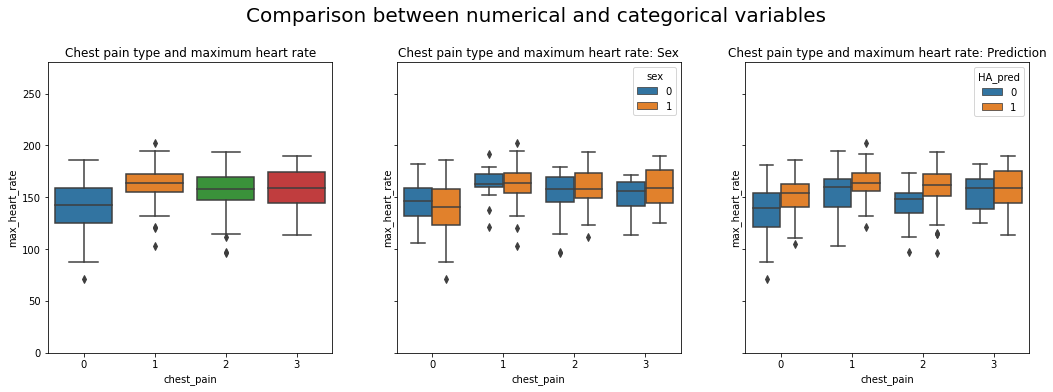

In [ ]:
# line in-between as a median
# top and the bottom are quartiles 
# whiskers extend to the highest and lowest observations
# a little rhombus is an outlier 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

fig.suptitle('Comparison between numerical and categorical variables', fontsize=20, y=1.08)

axes[0] = sns.boxplot(data=data, x='chest_pain', y ='max_heart_rate', ax=axes[0])
axes[0].set(title='Chest pain type and maximum heart rate')

axes[1] = sns.boxplot(data=data, x='chest_pain', y='max_heart_rate', ax=axes[1], hue='sex')
axes[1].set(title='Chest pain type and maximum heart rate: Sex')

axes[2] = sns.boxplot(data=data, x='chest_pain', y ='max_heart_rate', ax=axes[2], hue='HA_pred')
axes[2].set(title='Chest pain type and maximum heart rate: Prediction')

axes[0].set(ylim=(0,280))

fig.tight_layout()

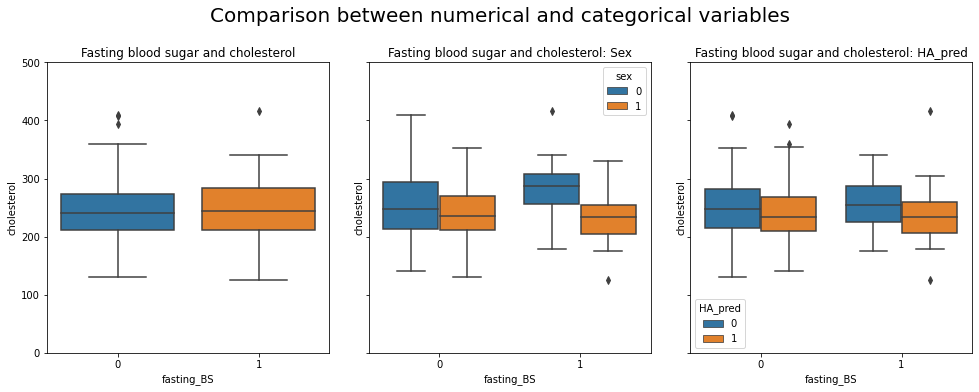

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5), sharey=True)

fig.suptitle('Comparison between numerical and categorical variables', fontsize=20, y=1.08)

axes[0] = sns.boxplot(data=data, x='fasting_BS', y ='cholesterol', ax=axes[0])
axes[0].set(title='Fasting blood sugar and cholesterol')
axes[1] = sns.boxplot(data=data, x='fasting_BS', y='cholesterol', ax=axes[1], hue='sex')
axes[1].set(title='Fasting blood sugar and cholesterol: Sex')
axes[2] = sns.boxplot(data=data, x='fasting_BS', y ='cholesterol', ax=axes[2], hue='HA_pred')
axes[2].set(title='Fasting blood sugar and cholesterol: HA_pred')
axes[0].set(ylim=(0,500))

fig.tight_layout()

`fasting_BS`: fasting blood sugar <br>
- normal: less than 100 mg/dL
- prediabetes: 100-125 mg/dL
- diabetes: 126 mg/dL or higher 
- fasting blood sugar > 120 mg/dl
  - `1`: > 120 mg/dl; true
  - `0`: <= 120 mg/dl; false <br><br>

As per our discription of `fasting_BS` above ...

[]

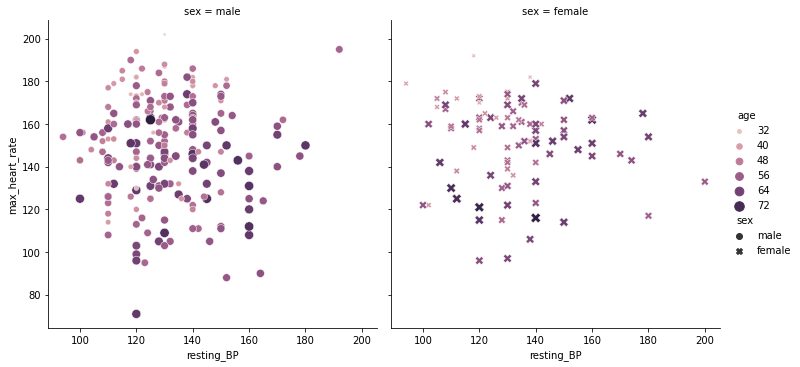

In [351]:
"""
Based on age and sex of the participants plot a distribution (next: relationship could be a correlation plot) of following continuous variables pairs: 
- resting_BP and cholesterol
- resting_BP and max_heart_rate
- resting_BP and oldpeak
- max_heart_rate and cholesterol
- max_heart_rate and oldpeak
- oldpeak and cholesterol
"""

#fig, ax = plt.subplots(figsize=(8,8))
#ax.suptitle('Age and gender distribution of multiple continuous variables', fontsize=22, y=1.05)

ax = sns.relplot(data=data, x='resting_BP', y='max_heart_rate', col="sex", hue='age', size='age', style="sex", sizes=(10,100), col_wrap=2)
#ax.set(title='Age and gender distribution of multiple continuous variables')

plt.plot()

In [348]:
#fig, ax = plt.subplots(figsize=(4,4))
#sns.displot(data=data, x='cholesterol', hue='sex', kind='kde', multiple='stack')

In [ ]:
# sns.relplot(
#     data=data,
#     x='cp',
#     y='resting_BP',
#     col='age',
#     hue='age',
#     size='sex',
#     sizes=(10,100)
# )

In [347]:
# data.rename(columns={'cp':'chest_pain','trtbps': 'resting_BP','chol':'cholesterol', 'fbs':'fasting_BS', 'restecg':'resting_ECG', 'thalachh': 'max_heart_rate', 'slp': 'ST_slope', 'output':'HA_pred' },inplace=True)

In [ ]:
#data.groupby(['sex']).mean()

In [ ]:
# # Calculate the mean of cholesterol per age and sex.
# data_paired = data.groupby(['sex', 'age'])['cholesterol'].mean()
# display(data_paired)